<a href="https://colab.research.google.com/github/beitezhu/machinelearning/blob/main/Beite_Case_3_1114.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
wikipedia_data =pd.read_csv('Wikipedia.csv')

In [ ]:
# Number of cases of vandalism
num_vandalism_cases = wikipedia_data['Vandal'].sum()
print(num_vandalism_cases)

1815


In [ ]:
# Average number of words added and removed
average_words_added = wikipedia_data['NumWordsAdded'].mean()
average_words_removed = wikipedia_data['NumWordsRemoved'].mean()

print(average_words_added)
print(average_words_removed)

4.050051599587204
3.5128998968008256


In [ ]:
# Most correlated variable with 'Vandal'
correlation_with_vandal = wikipedia_data.corr()['Vandal'].sort_values(ascending=False)
print(correlation_with_vandal)


Vandal             1.000000
HTTP               0.151554
NumWordsRemoved    0.036360
NumWordsAdded     -0.000729
Minor             -0.213995
LoggedIn          -0.429255
Name: Vandal, dtype: float64


1 i) Number of cases of vandalism detected: 1815

ii)Average number of words added: ~4.05
Average number of words removed: ~3.51

iii)Variable most correlated with vandalism: 'HTTP', with a correlation coefficient of 0.152 indicating a mild positive correlation.​
The most negatively correlated variable is 'LoggedIn', with a correlation coe cient of -0.429255.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = wikipedia_data.drop(['Vandal'], axis=1)
y = wikipedia_data['Vandal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42,stratify=wikipedia_data['Vandal'])

In [ ]:
baseline_accuracy = (y_test == 0).sum() / len(y_test)
baseline_accuracy


0.531384350816853

In [ ]:
baseline_predictions = np.zeros(len(y_test))

# Calculate the accuracy of the baseline model
baseline_accuracy = accuracy_score(y_test, baseline_predictions)

print(f'b) Accuracy of the baseline model: {baseline_accuracy:.2%}')

b) Accuracy of the baseline model: 53.14%


In [ ]:
# Splitting the training set further for the validation set approach
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


In [ ]:
# Possible values for min_samples_leaf
min_samples_leaf_values = [10, 50, 100]

# Initializing variables to store the best model
best_model = None
best_accuracy = 0
best_min_samples_leaf = None

In [ ]:
# Define three CART models with different min_samples_leaf values
ctree_10 = DecisionTreeClassifier(min_samples_leaf=10)
ctree_50 = DecisionTreeClassifier(min_samples_leaf=50)
ctree_100 = DecisionTreeClassifier(min_samples_leaf=100)

In [ ]:
# Fit the models
ctree_10.fit(X_train_1, y_train_1)
ctree_50.fit(X_train_1, y_train_1)
ctree_100.fit(X_train_1, y_train_1)

DecisionTreeClassifier(min_samples_leaf=100)

In [ ]:
# Calculate accuracy for each model on the validation set
accuracy_10 = accuracy_score(y_val_1, ctree_10.predict(X_val_1))
accuracy_50 = accuracy_score(y_val_1, ctree_50.predict(X_val_1))
accuracy_100 = accuracy_score(y_val_1, ctree_100.predict(X_val_1))

print(accuracy_10,accuracy_50,accuracy_100)

0.714987714987715 0.7297297297297297 0.7248157248157249


In [ ]:
# Find the model with the highest accuracy
accuracies = {10: accuracy_10, 50: accuracy_50, 100: accuracy_100}
best_min_samples_leaf = max(accuracies, key=accuracies.get)

print(best_min_samples_leaf)

50


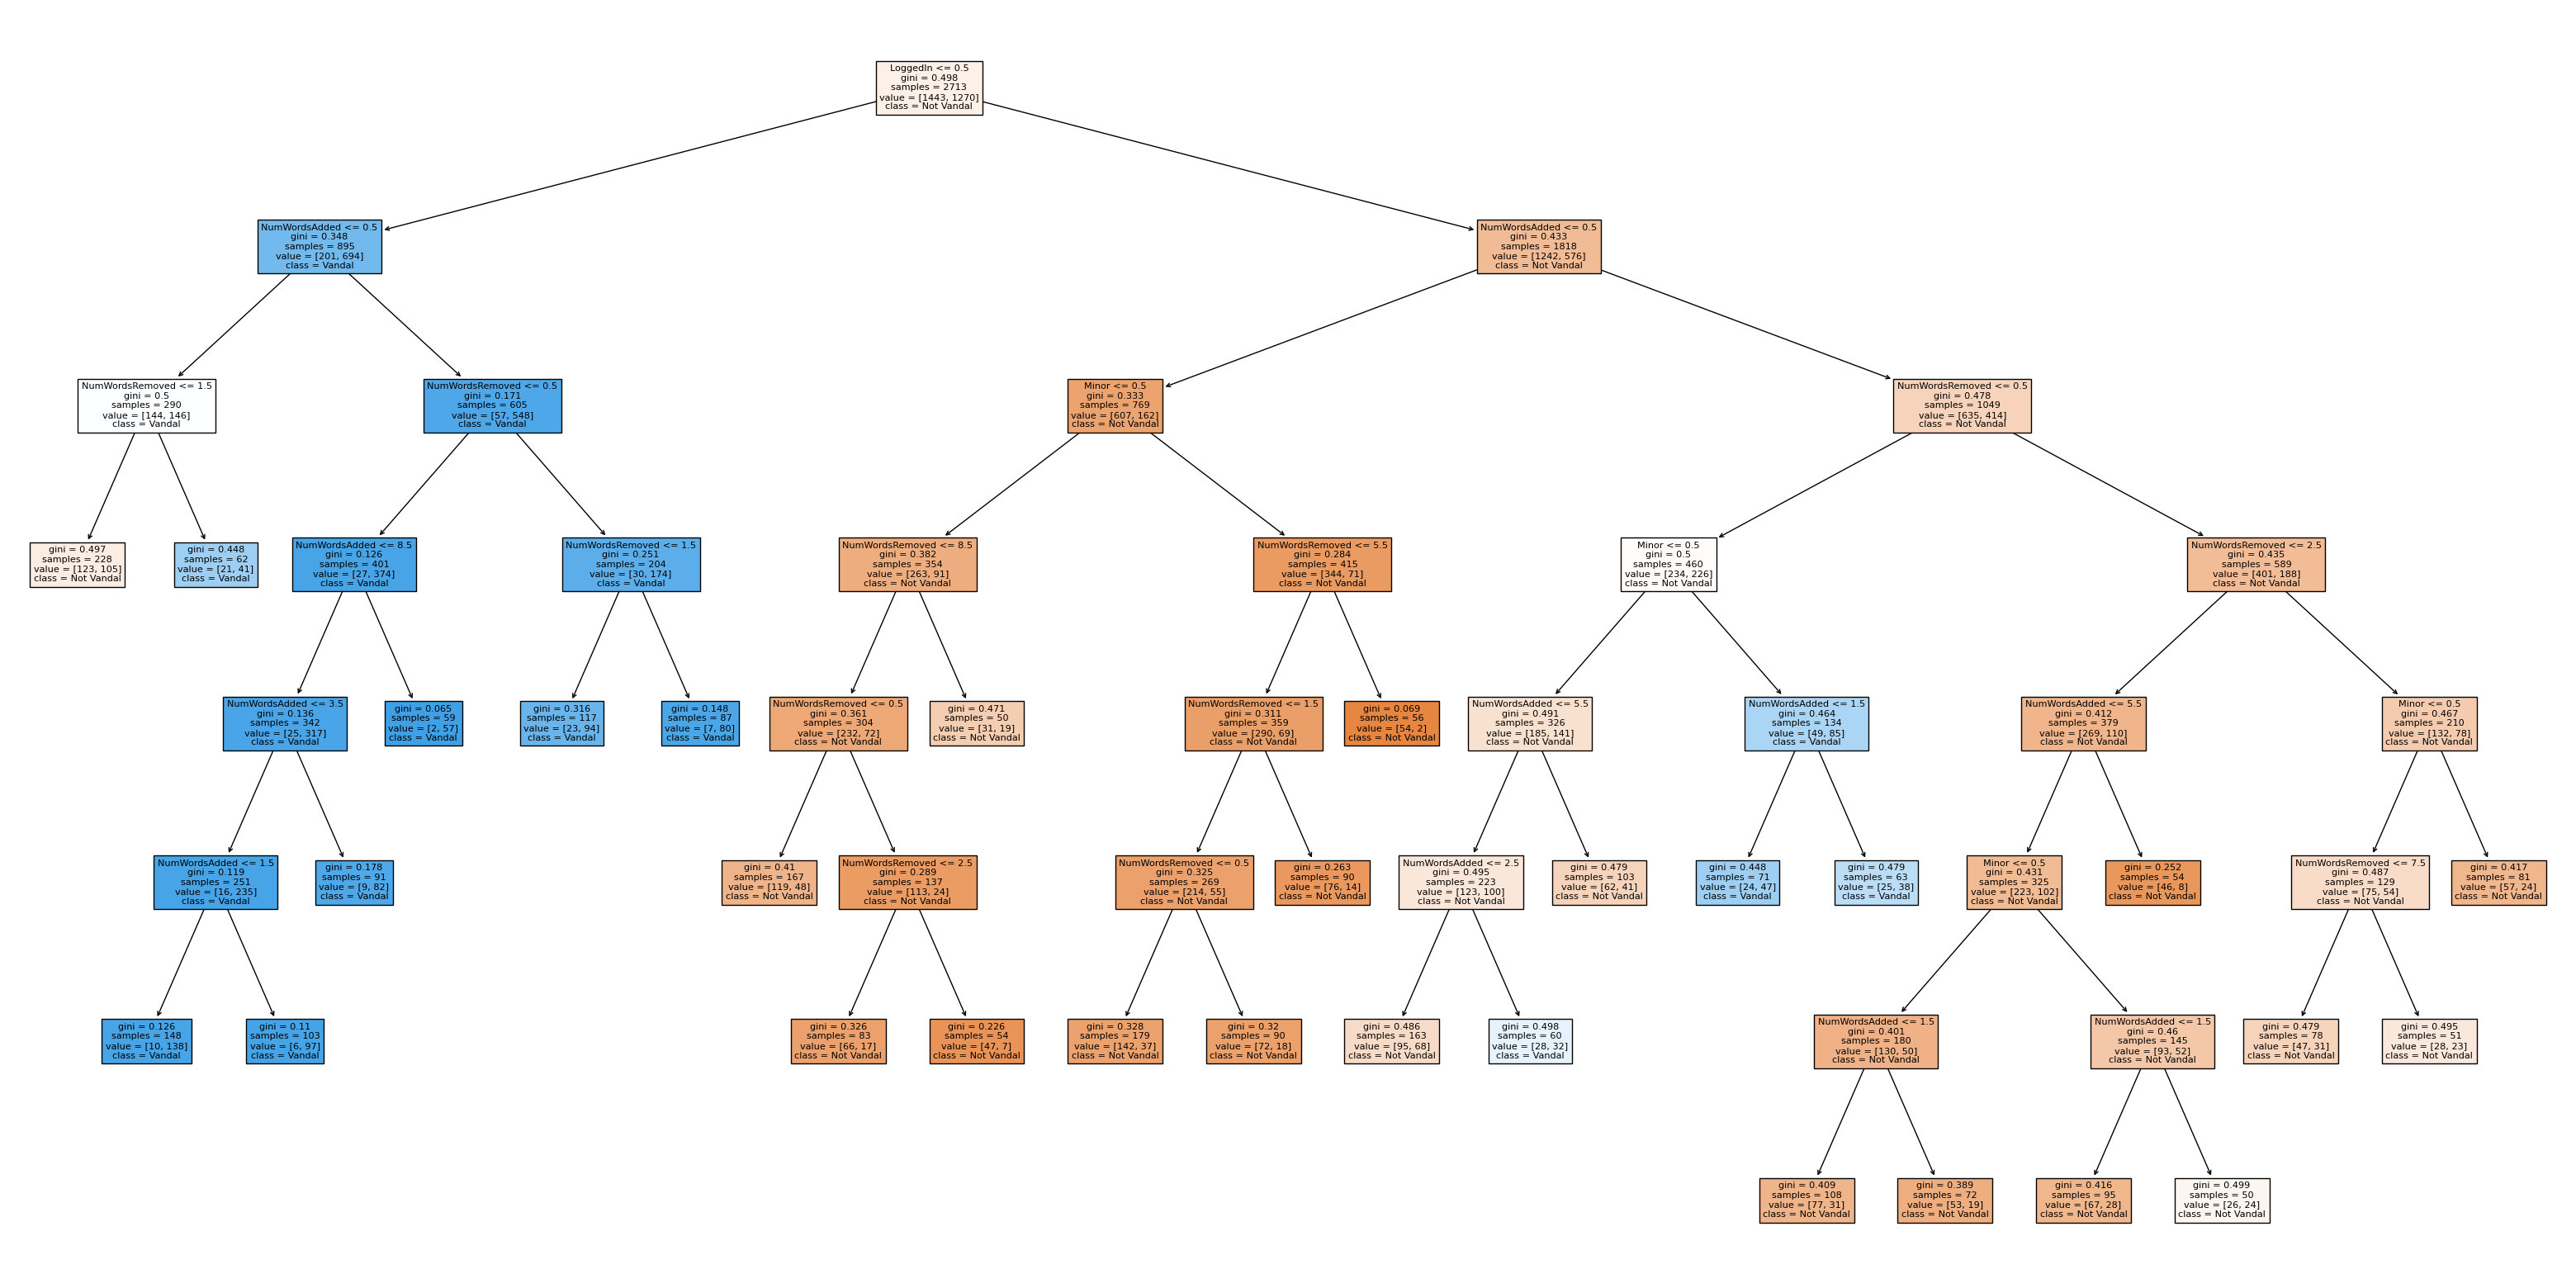

In [ ]:
# Fit the final model using the best parameter
final_ctree = DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf)
final_ctree.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(40,20))
plot_tree(final_ctree, filled=True, feature_names=X.columns, class_names=['Not Vandal', 'Vandal'])
plt.show()

c i） Minor, Loggedin,NumWordsAdded and NumWordsRemoved are in the CART.

LoggedIn appears at the top of the tree, which indicates it is the most significant variable for the initial split.

NumWordsAdded and NumWordsRemoved are also on the top which means they also have strong influence.

In [ ]:
# Evaluate the model on the test set
# Assuming X_test and y_test are defined
test_accuracy = accuracy_score(y_test, final_ctree.predict(X_test))
print(test_accuracy)


0.7239896818572656


c ii) the accurency of the model on the test set is 72.40%

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 建立隨機森林模型
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 計算測試集準確率
rf_test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print(f'Random Forest Test Accuracy(100): {rf_test_accuracy:.2%}')


Random Forest Test Accuracy(100): 71.37%


In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print(f'Random Forest Test Accuracy(200): {rf_test_accuracy:.2%}')

Random Forest Test Accuracy(200): 71.54%


In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)
rf_test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print(f'Random Forest Test Accuracy(500): {rf_test_accuracy:.2%}')

Random Forest Test Accuracy(500): 71.54%


d) Random Forest Test Accuracy with 200: 71.54%

CART model Accuracy：72.40%

It is lower than the CART model Accuracy

Random Forests are known for their robustness and generally good performance across a wide range of datasets. They are less likely to overfit compared to a single decision tree and can model complex relationships better. However, a Random Forest can also underperform compared to a CART model, possibly due to reasons such as over-complexity of the Random Forest, underfitting in the Random Forest, or noise in the data.

e1）Usefulness of the Model for Detecting Vandalism on Wikipedia:

The model I built could be useful for Wikipedia in detecting vandalism. It automates the identification of potential vandalism, reducing the burden of manual review. This is particularly beneficial when dealing with a high volume of edits.

However, the utility of such a model is limited by its accuracy and generalizability. If the model generates too many false positives (wrongly identifying legitimate edits as vandalism), it could lead to unnecessary review workload. Conversely, too many false negatives (failing to identify actual vandalism) might not effectively protect content quality.

e2）Additional Data Variables for Edit Analysis:

- Editor Information: For instance, the historical behavior of the editor, their contribution frequency, account age, etc. This can help distinguish edits made by new users versus experienced users.

- Detailed Quality of Edit Content: Such as changes in the text, the number of hyperlinks added or removed, frequency of grammatical and spelling errors. These details can provide more clues about the quality of the edits.

- Context of the Edit: Like the state of the page before and after the edit, page traffic, frequency of edits on the page, etc. This helps understand the context in which the editing behavior occurs.

e3）Model Extension to Other Pages:

Whether the model can effectively extend to other pages depends on various factors. For instance, the editing patterns might significantly differ across pages, especially those involving technical or controversial topics.

Additionally, training the model on the "Language" page might have made it overfit to specific features of that page, which may not effectively address vandalism on other pages. While the model might be somewhat applicable to other pages, its efficacy could vary due to differences in content and editing behaviors.

To enhance the model's generalizability, it's advisable to train and test it across multiple different types of pages and continually collect data for model adjustments and optimization.
